In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../2nd-session/datasets/cancer patient data sets.csv')
df

,index,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,0,P1,33,1,2,4,5,4,3,2,...,3,4,2,2,3,1,2,3,4,Low
1,1,P10,17,1,3,1,5,3,4,2,...,1,3,7,8,6,2,1,7,2,Medium
2,2,P100,35,1,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
3,3,P1000,37,1,7,7,7,7,6,7,...,4,2,3,1,4,5,6,7,5,High
4,4,P101,46,1,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,P995,44,1,6,7,7,7,7,6,...,5,3,2,7,8,2,4,5,3,High
996,996,P996,37,2,6,8,7,7,7,6,...,9,6,5,7,2,4,3,1,4,High
997,997,P997,25,2,4,5,6,5,5,4,...,8,7,9,2,1,4,6,7,2,High
998,998,P998,18,2,6,8,7,7,7,6,...,3,2,4,1,4,2,4,2,3,High


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

## Heatmap


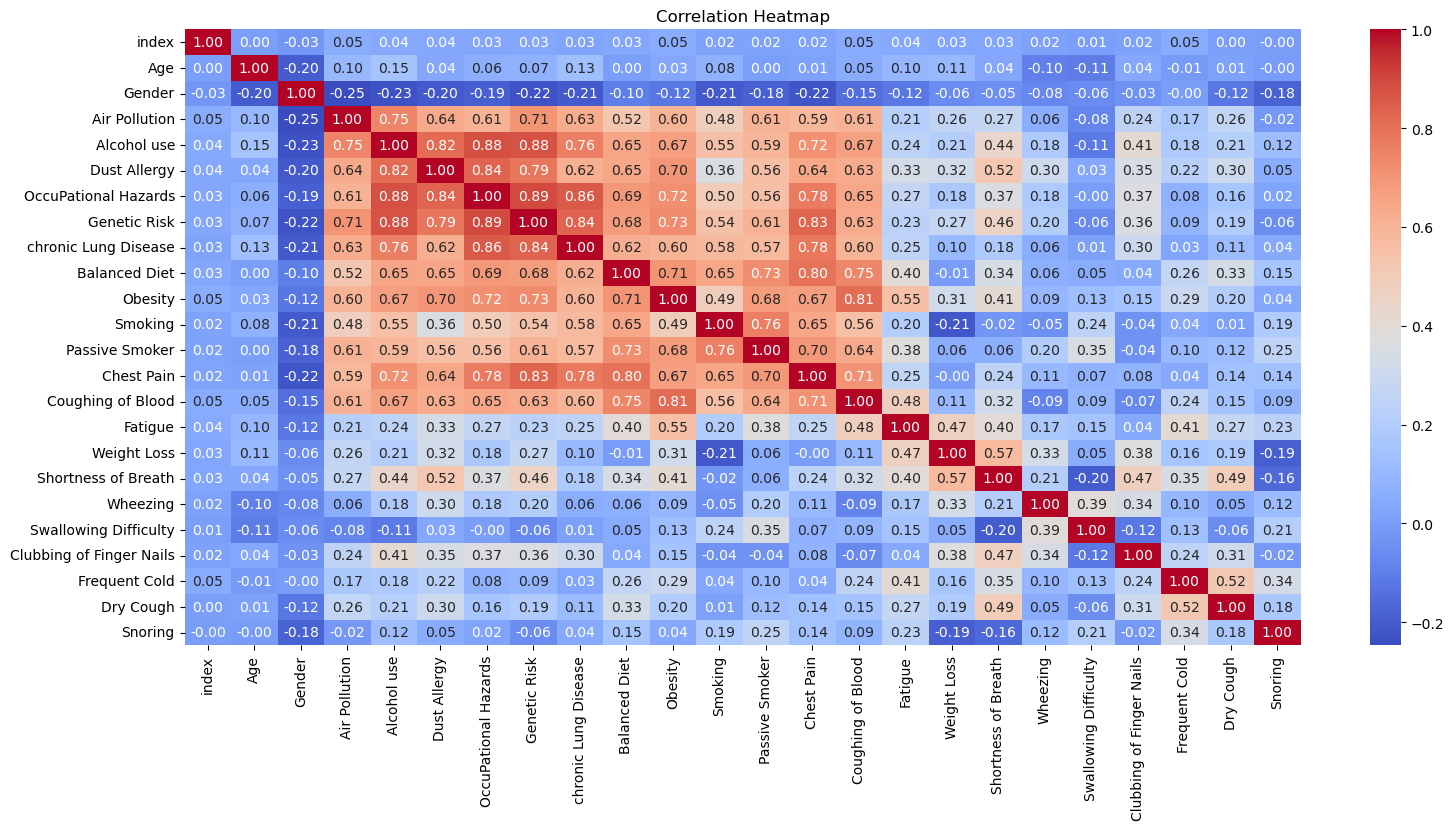

In [14]:
# Korelasi hanya untuk kolom numerik
plt.figure(figsize=(18, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Main Code


In [18]:
gen_risk = df['Genetic Risk']
occ_haz = df['OccuPational Hazards']

# Pearson Correlation

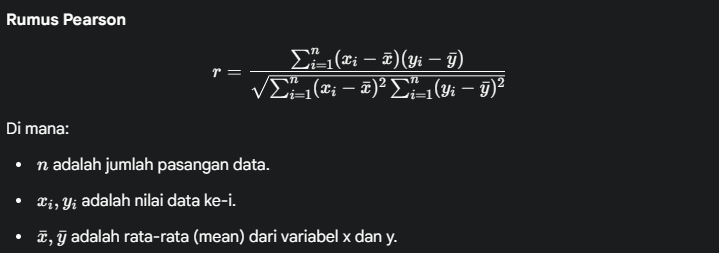

Menghitung koefisien korelasi Pearson dari dasar. x dan y harus berupa pandas Series atau numpy array dengan panjang yang sama.


In [7]:
def pearson_correlation(x, y):
    if len(x) != len(y):
        raise ValueError("x dan y harus memiliki panjang yang sama.")

    # Mengubah array ke np.array untuk operasi vektor
    x = np.array(x)
    y = np.array(y)

    # Menghitung rata-rata x dan y
    mean_x = np.mean(x)
    mean_y = np.mean(y)

    # Cek jika ada pembagian dengan nol karena pembagian nol menyebabkan hasil tidak terdefinisi (undefined)
    if np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2)) == 0:
        return 0

    return np.sum((x - mean_x) * (y - mean_y)) / np.sqrt(np.sum((x - mean_x)**2) * np.sum((y - mean_y)**2))

# Spearman's Rank Correlation (rho)

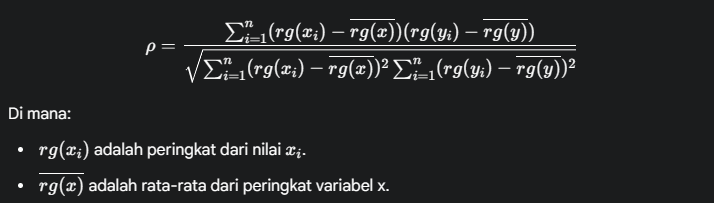

Menghitung korelasi peringkat Spearman dari dasar. Memanfaatkan fungsi pearson_correlation pada data peringkat. x dan y harus berupa pandas Series.
Fungsi isinstance() di Python digunakan untuk memeriksa apakah sebuah objek merupakan instance (objek turunan) dari tipe data atau kelas tertentu.


In [8]:
def spearman_correlation(x, y):
    if not isinstance(x, pd.Series) or not isinstance(y, pd.Series):
        x = pd.Series(x)
        y = pd.Series(y)
        
    # Dapatkan peringkat dari setiap data
    rank_x = x.rank()
    rank_y = y.rank()

    # Hitung korelasi Pearson dari data peringkat
    return pearson_correlation(rank_x, rank_y)

# Kendall's Tau Correlation

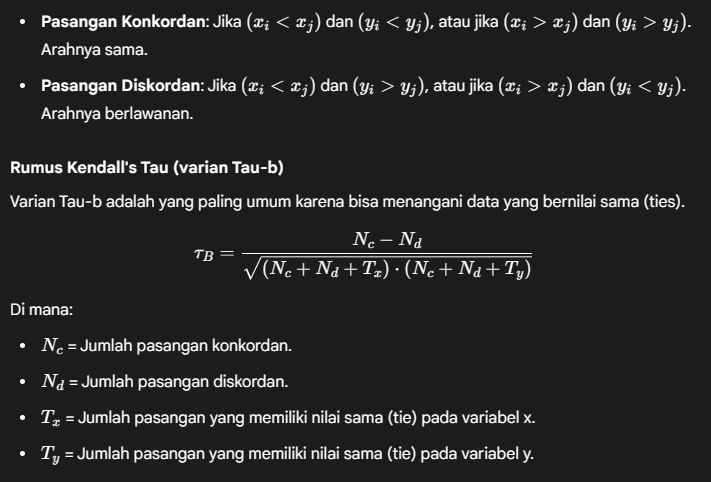

Menghitung korelasi Kendall's Tau (varian Tau-b) dari dasar. x dan y harus berupa pandas Series atau numpy array.


In [ ]:
def kendall_tau(x, y):
    if len(x) != len(y):
        raise ValueError("x dan y harus memiliki panjang yang sama.")
        
    x = np.array(x)
    y = np.array(y)
    n = len(x)
    
    concordant = 0
    discordant = 0
    ties_x = 0
    ties_y = 0

    # Iterasi melalui semua pasangan unik (i, j)
    for i in range(n):
        for j in range(i + 1, n):
            # Tentukan tanda perbedaan untuk x dan y
            sign_x = np.sign(x[i] - x[j])
            sign_y = np.sign(y[i] - y[j])

            if sign_x == 0 and sign_y == 0:
                # Tie di kedua variabel, tidak dihitung di C atau D tapi perlu dihitung untuk koreksi tie total
                ties_x += 1
                ties_y += 1
            elif sign_x == 0:
                ties_x += 1 # Tie hanya di x
            elif sign_y == 0:
                ties_y += 1 # Tie hanya di y
            elif sign_x == sign_y:
                concordant += 1
            else:
                discordant += 1
    
    if np.sqrt((concordant + discordant + ties_x) * (concordant + discordant + ties_y)) == 0:
        return 0
        
    return (concordant - discordant) / np.sqrt((concordant + discordant + ties_x) * (concordant + discordant + ties_y))

In [22]:
# Kalkulasi
pearson = pearson_correlation(gen_risk, occ_haz)
spearman = spearman_correlation(gen_risk, occ_haz)
kendall = kendall_tau(gen_risk, occ_haz)

print("\n--- Hasil untuk Data Monotonik ---")
print(f"Korelasi Pearson: {pearson:.4f}")
print(f"Korelasi Spearman: {spearman:.4f}")
print(f"Korelasi Kendall: {kendall:.4f}")


--- Hasil untuk Data Monotonik ---
Korelasi Pearson: 0.8930
Korelasi Spearman: 0.8774
Korelasi Kendall: 0.6538
